```plaintext
To be done: function for measurements and plots

Long road, Two lanes, Different Vmax 
Add car when start point is empty 
Remove car at end point 

Ordered Rules:
1. Change lane
2. Change speed
    ·Accelerate
    ·Slow down
    ·Random brake
    ·
3. Move

```plaintext
This is long_road model without density control. To do the density control, see the next code block.

In [ ]:
# # model without density control
# import numpy as np
# import matplotlib.pyplot as plt


# # dict to store different driver type(can also be used for reaction/...)
# DRIVER_TYPES = {
#     0: {'vmax': 3},
#     1: {'vmax': 5},
#     2: {'vmax': 7}
# }

# # initialize the road
# def initialize_road(length):
#     lanes = [np.full(length, -1), np.full(length, -1)]
#     # store driver type for each car
#     driver_types = [np.full(length, -1), np.full(length, -1)]
#     return lanes, driver_types

# # get the gap
# def get_gap_ahead_same_lane(lane, pos):
#     length = len(lane)

#     # check if the current position is valid
#     if pos < 0 or pos >= length:
#         raise ValueError("Current position is out of range")

#     # check if there is a car at the current position
#     if lane[pos] == -1:
#         raise ValueError("There is no car at the current position")

#     gap = 0
#     for i in range(1, length - pos):  # we only have to check sites after pos
#         next_pos = pos + i

#         if lane[next_pos] >= 0:
#             return gap
#         gap += 1
#     return gap

# # get forward and backward gaps for other lane
# def get_gaps_other_lane(lanes, lane_idx, pos):
#     other_lane = lanes[1 - lane_idx]
#     length = len(other_lane)

#     # Forward
#     forward_gap = 0
#     for i in range(1, length - pos):
#         next_pos = pos + i
#         if other_lane[next_pos] >= 0:
#             break
#         forward_gap += 1

#     # Backward
#     backward_gap = 0
#     for i in range(1, pos + 1): # we only have to check sites between pos and start point
#         prev_pos = pos - i
#         if other_lane[prev_pos] >= 0:
#             break
#         forward_gap += 1

#     return forward_gap, backward_gap

# # check whether should change the lane
# def should_change_lane(lanes, lane_idx, pos, driver_types, p_change):

#     if lanes[lane_idx][pos] == -1:
#         return False

#     driver_type = driver_types[lane_idx][pos]
#     if driver_type == -1:
#         return False

#     gap = get_gap_ahead_same_lane(lanes[lane_idx], pos)
#     v = lanes[lane_idx][pos]

#     # T1: Check if blocked
#     if gap >= v + 1:
#         return False

#     # T2 & T3: Check if other lane has enough space
#     gap_front, gap_back = get_gaps_other_lane(lanes, lane_idx, pos)
#     if gap_front <= v + 1 or gap_back < 7:
#         return False

#     # T4: Random decision
#     if np.random.random() >= p_change:
#         return False

#     return True

# # updatge change of lane
# def change_lanes(lanes, driver_types, p_change):
#     length = len(lanes[0])
#     changes = []

#     # record the index and position that would change lane
#     for lane_idx in range(2):
#         for pos in range(length):
#             if should_change_lane(lanes, lane_idx, pos, driver_types, p_change):
#                 changes.append((lane_idx, pos))

#     # change lane
#     for lane_idx, pos in changes:
#         if lanes[lane_idx][pos] >= 0:
#             # get velocity and driver type
#             v = lanes[lane_idx][pos]
#             driver_type = driver_types[lane_idx][pos]

#             # change lane
#             lanes[lane_idx][pos] = -1
#             driver_types[lane_idx][pos] = -1

#             lanes[1-lane_idx][pos] = v
#             driver_types[1-lane_idx][pos] = driver_type

#     return lanes, driver_types

# # update velocities for each step
# def update_velocities(lanes, driver_types, p):
#     for lane_idx in range(2):
#         for pos in range(len(lanes[0])):
#             if lanes[lane_idx][pos] >= 0:
#                 driver_type = driver_types[lane_idx][pos]

#                 vmax = DRIVER_TYPES[driver_type]['vmax']
#                 v = lanes[lane_idx][pos]

#                 # Acceleration
#                 if v < vmax:
#                     v += 1

#                 # Slowing down
#                 gap = get_gap_ahead_same_lane(lanes[lane_idx], pos)
#                 v = min(v, gap)

#                 # Slowing down
#                 if v > 0 and np.random.random() < p:
#                     v -= 1

#                 lanes[lane_idx][pos] = v

#     return lanes

# # move cars after get velocity
# def move_cars(lanes, driver_types):
#     length = len(lanes[0])
#     new_lanes = [np.full(length, -1), np.full(length, -1)]
#     new_driver_types = [np.full(length, -1), np.full(length, -1)]

#     for lane_idx in range(2):
#         for pos in range(length):
#             if lanes[lane_idx][pos] >= 0:
#                 v = lanes[lane_idx][pos]
#                 new_pos = pos + v

#                 if new_pos < length:
#                     new_lanes[lane_idx][new_pos] = v
#                     new_driver_types[lane_idx][new_pos] = driver_types[lane_idx][pos]

#     return new_lanes, new_driver_types

# # add car when start point is empty
# def add_new_car(lanes, driver_types):
#     for lane_idx in range(2):
#         # add car if the start point is empty
#         if lanes[lane_idx][0] == -1:
#             lanes[lane_idx][0] = 0
#             new_driver_type = np.random.randint(0, len(DRIVER_TYPES))
#             driver_types[lane_idx][0] = new_driver_type
#     return lanes, driver_types

# # remove car when it reach end point
# def remove_cars(lanes, driver_types, exit_point):
#     # remove the car when it reach end point
#     for lane_idx in range(2):
#         lanes[lane_idx][exit_point:] = -1
#         driver_types[lane_idx][exit_point:] = -1
#     return lanes, driver_types

# # code for update traffic for each step
# def update_traffic(lanes, driver_types, exit_point, p=0.3, p_change=0.3):
#     # change lane
#     lanes, driver_types = change_lanes(lanes, driver_types, p_change)

#     # update velocities
#     lanes = update_velocities(lanes, driver_types, p)

#     # move cars
#     lanes, driver_types = move_cars(lanes, driver_types)

#     # remove cars that reach end point
#     lanes, driver_types = remove_cars(lanes, driver_types, exit_point)

#     # add new car at start point
#     lanes, driver_types = add_new_car(lanes, driver_types)

#     return lanes, driver_types

# # code for calculate traffic measurements
# def calculate_traffic_measurements(lanes):
#     length = len(lanes[0])
#     measure_point = length // 2
#     total_flow = 0
#     num_cars = 0
#     total_velocity = 0

#     for lane_idx in range(2):
#         car_positions = np.where(lanes[lane_idx] >= 0)[0]
#         car_velocities = lanes[lane_idx][car_positions]

#         num_cars += len(car_positions)
#         total_velocity += np.sum(car_velocities)


#         for pos in car_positions:
#             velocity = lanes[lane_idx][pos]
#             if velocity > 0:
#                 start_pos = pos - velocity

#                 if start_pos <= measure_point < pos:
#                     total_flow += 1

#     density = num_cars / (2 * length)
#     avg_velocity = total_velocity / num_cars

#     return total_flow, density, avg_velocity

# # run the simulation
# def simulate_traffic(length, t0, steps, p=0.3, p_change=0.3):
#     lanes, driver_types = initialize_road(length)
#     exit_point = length - 10

#     # first simulate t0 times, and begin the collection of data after the first t0 time steps
#     for _ in range(t0):
#         lanes, driver_types = update_traffic(lanes, driver_types, exit_point, p, p_change)


#     flows = []
#     densities = []
#     velocities = []

#     lanes_history = np.zeros((steps, 2, length), dtype=int)
#     driver_types_history = np.zeros((steps, 2, length), dtype=int)

#     lanes_history[0] = lanes
#     driver_types_history[0] = driver_types

#     # simulate and start to record the data
#     for step in range(steps):
#         flow, density, velocity = calculate_traffic_measurements(lanes)
#         flows.append(flow)
#         densities.append(density)
#         velocities.append(velocity)

#         lanes, driver_types = update_traffic(lanes, driver_types, exit_point, p, p_change)
#         if step < steps - 1:
#             lanes_history[step + 1] = lanes
#             driver_types_history[step + 1] = driver_types

#     return flows, densities, velocities, lanes_history, driver_types_history

# # just rough plot for the measurements
# def plot_traffic_measurements(flows, densities, velocities, steps):
#     time = np.arange(steps)

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#     ax1.plot(time, densities, 'b-', linewidth=1, alpha=0.7)
#     ax1.axhline(y=np.mean(densities), color='r', linestyle='--',
#                 label=f'Mean density: {np.mean(densities):.3f}')
#     ax1.set_ylabel('Density [cars/site]')
#     ax1.legend()

#     ax2.plot(time, velocities, 'g-', linewidth=1, alpha=0.7)
#     ax2.axhline(y=np.mean(velocities), color='r', linestyle='--',
#                 label=f'Mean velocity: {np.mean(velocities):.3f}')
#     ax2.set_ylabel('Average velocity [sites/timestep]')
#     ax2.set_xlabel('Time steps')
#     ax2.legend()

#     plt.tight_layout()
#     plt.show()

# #flows, densities, velocities, lanes_history, driver_types_history = simulate_traffic(1000, 100, 2000, p=0.3, p_change=0.3)
# #plot_traffic_measurements(flows, densities, velocities, 2000)




Simulating: 100%|██████████| 30/30 [14:15<00:00, 28.52s/it]


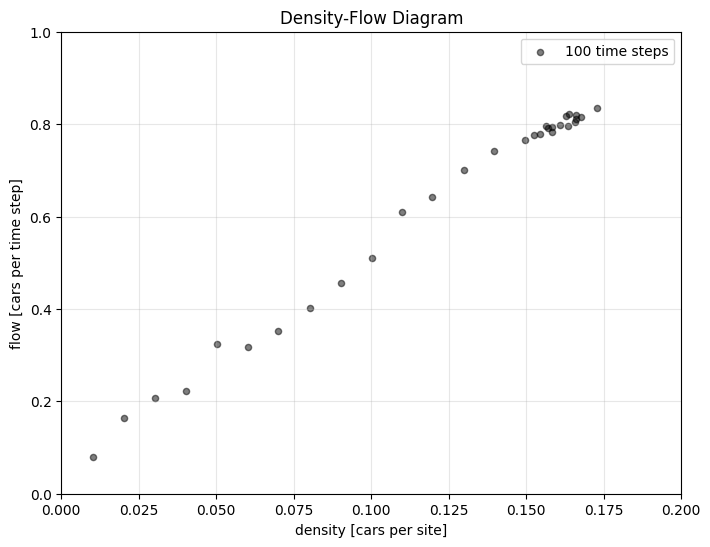

In [15]:
# model with density control
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


# dict to store different driver type(can also be used for reaction/...)
DRIVER_TYPES = {
    0: {'vmax': 3},    
    1: {'vmax': 5},      
    2: {'vmax': 7}   
}

# initialize the road
def initialize_road(length):
    lanes = [np.full(length, -1), np.full(length, -1)]  
    # store driver type for each car
    driver_types = [np.full(length, -1), np.full(length, -1)]  
    return lanes, driver_types

# get the gap 
def get_gap_ahead_same_lane(lane, pos):
    length = len(lane)
    
    # check if the current position is valid
    if pos < 0 or pos >= length:
        raise ValueError("Current position is out of range")
    
    # check if there is a car at the current position
    if lane[pos] == -1:
        raise ValueError("There is no car at the current position")
    
    gap = 0
    for i in range(1, length - pos):  # we only have to check sites after pos
        next_pos = pos + i
        
        if lane[next_pos] >= 0:
            return gap
        gap += 1
    return gap

# get forward and backward gaps for other lane
def get_gaps_other_lane(lanes, lane_idx, pos):
    other_lane = lanes[1 - lane_idx]
    length = len(other_lane)
    
    # Forward
    forward_gap = 0
    for i in range(1, length - pos): 
        next_pos = pos + i
        if other_lane[next_pos] >= 0:
            break
        forward_gap += 1
        
    # Backward
    backward_gap = 0    
    for i in range(1, pos + 1): # we only have to check sites between pos and start point
        prev_pos = pos - i
        if other_lane[prev_pos] >= 0:
            break
        forward_gap += 1
        
    return forward_gap, backward_gap

# check whether should change the lane
def should_change_lane(lanes, lane_idx, pos, driver_types, p_change):

    if lanes[lane_idx][pos] == -1:
        return False
    
    driver_type = driver_types[lane_idx][pos]
    if driver_type == -1:
        return False

    gap = get_gap_ahead_same_lane(lanes[lane_idx], pos)
    v = lanes[lane_idx][pos]
    
    # T1: Check if blocked
    if gap >= v + 1:
        return False
    
    # T2 & T3: Check if other lane has enough space
    gap_front, gap_back = get_gaps_other_lane(lanes, lane_idx, pos)
    if gap_front <= v + 1 or gap_back < 7:
        return False
    
    # T4: Random decision
    if np.random.random() >= p_change:
        return False
    
    return True

# updatge change of lane
def change_lanes(lanes, driver_types, p_change):
    length = len(lanes[0])
    changes = []
    
    # record the index and position that would change lane
    for lane_idx in range(2):
        for pos in range(length):
            if should_change_lane(lanes, lane_idx, pos, driver_types, p_change):
                changes.append((lane_idx, pos))
                
    # change lane
    for lane_idx, pos in changes:
        if lanes[lane_idx][pos] >= 0:
            # get velocity and driver type
            v = lanes[lane_idx][pos]
            driver_type = driver_types[lane_idx][pos]
            
            # change lane
            lanes[lane_idx][pos] = -1
            driver_types[lane_idx][pos] = -1
            
            lanes[1-lane_idx][pos] = v
            driver_types[1-lane_idx][pos] = driver_type
    
    return lanes, driver_types

# update velocities for each step
def update_velocities(lanes, driver_types, p):
    for lane_idx in range(2):
        for pos in range(len(lanes[0])):
            if lanes[lane_idx][pos] >= 0:
                driver_type = driver_types[lane_idx][pos]

                vmax = DRIVER_TYPES[driver_type]['vmax']
                v = lanes[lane_idx][pos]
                
                # Acceleration
                if v < vmax:
                    v += 1
                
                # Slowing down
                gap = get_gap_ahead_same_lane(lanes[lane_idx], pos)
                v = min(v, gap)
                
                # Slowing down
                if v > 0 and np.random.random() < p:
                    v -= 1
                
                lanes[lane_idx][pos] = v
    
    return lanes

# move cars after get velocity
def move_cars(lanes, driver_types):
    length = len(lanes[0])
    new_lanes = [np.full(length, -1), np.full(length, -1)]
    new_driver_types = [np.full(length, -1), np.full(length, -1)]
    
    for lane_idx in range(2):
        for pos in range(length):
            if lanes[lane_idx][pos] >= 0:
                v = lanes[lane_idx][pos]
                new_pos = pos + v
                
                if new_pos < length:
                    new_lanes[lane_idx][new_pos] = v
                    new_driver_types[lane_idx][new_pos] = driver_types[lane_idx][pos]
    
    return new_lanes, new_driver_types

# add car when start point is empty and current density is lower than target_density
def add_new_car_with_density_control(lanes, driver_types, target_density):

    length = len(lanes[0])
    current_cars = sum(sum(lane >= 0) for lane in lanes)
    current_density = current_cars / (2 * length)
    
    if current_density < target_density:
        for lane_idx in range(2):
            if lanes[lane_idx][0] == -1:  
                lanes[lane_idx][0] = 0
                new_driver_type = np.random.randint(0, len(DRIVER_TYPES))
                driver_types[lane_idx][0] = new_driver_type
    
    return lanes, driver_types

# remove car when it reach end point
def remove_cars(lanes, driver_types, exit_point):
    # remove the car when it reach end point
    for lane_idx in range(2):
        lanes[lane_idx][exit_point:] = -1
        driver_types[lane_idx][exit_point:] = -1
    return lanes, driver_types

# code for update traffic for each step
def update_traffic_with_density(lanes, driver_types, exit_point, target_density, p=0.3, p_change=0.3):
    # change lane
    lanes, driver_types = change_lanes(lanes, driver_types, p_change)
    
    # update velocities
    lanes = update_velocities(lanes, driver_types, p)
    
    # move cars
    lanes, driver_types = move_cars(lanes, driver_types)
    
    # remove cars that reach end point
    lanes, driver_types = remove_cars(lanes, driver_types, exit_point)
    
    # add new car at start point
    lanes, driver_types = add_new_car_with_density_control(lanes, driver_types, target_density)
    
    return lanes, driver_types

# code for calculate traffic measurements
def calculate_traffic_measurements(lanes):
    length = len(lanes[0])
    measure_point = length // 2
    total_flow = 0
    num_cars = 0
    total_velocity = 0
    
    for lane_idx in range(2):
        car_positions = np.where(lanes[lane_idx] >= 0)[0]
        car_velocities = lanes[lane_idx][car_positions]
        
        num_cars += len(car_positions)
        total_velocity += np.sum(car_velocities)
        
        
        for pos in car_positions:
            velocity = lanes[lane_idx][pos]
            if velocity > 0:
                start_pos = pos - velocity
                
                if start_pos <= measure_point < pos:
                    total_flow += 1
    
    density = num_cars / (2 * length)  
    avg_velocity = total_velocity / num_cars if num_cars > 0 else 0
    
    return total_flow, density, avg_velocity

# run the simulation
def simulate_traffic_with_density_control(length, t0, steps, target_density, p=0.3, p_change=0.3):
    lanes, driver_types = initialize_road(length)
    exit_point = length - 10
    
    # first run the code t0 times, and begin the collection of data after the first t0 time steps
    for _ in range(t0):
        lanes, driver_types = update_traffic_with_density(lanes, driver_types, exit_point, target_density, p, p_change)
    
    flows = []
    densities = []
    velocities = []
    
    lanes_history = np.zeros((steps, 2, length), dtype=int)
    driver_types_history = np.zeros((steps, 2, length), dtype=int)

    lanes_history[0] = lanes
    driver_types_history[0] = driver_types
    
    # simulate and start to record the data
    for step in range(steps):
        flow, density, velocity = calculate_traffic_measurements(lanes)
        flows.append(flow)
        densities.append(density)
        velocities.append(velocity)
        
        lanes, driver_types = update_traffic_with_density(lanes, driver_types, exit_point, target_density, p, p_change)
        if step < steps - 1:
            lanes_history[step + 1] = lanes
            driver_types_history[step + 1] = driver_types
            
    return flows, densities, velocities, lanes_history, driver_types_history


def simulate_multiple_densities(length=1000, t0=5000, steps=500):
    density_range = np.linspace(0.01, 0.3, 30)
    
    flows_data = []
    densities_data = []
    # one thing to notice, target_density is not actual density.
    for target_density in tqdm(density_range, desc="Simulating"):
        flows, densities, _, _, _ = simulate_traffic_with_density_control(length, t0, steps, target_density)
        
        flows_data.append(np.mean(flows))
        densities_data.append(np.mean(densities))
        
    plt.figure(figsize=(8, 6))
    plt.scatter(densities_data, flows_data, alpha=0.5, s=20, color='black', label='100 time steps')

    plt.xlabel('density [cars per site]')
    plt.ylabel('flow [cars per time step]')
    plt.title('Density-Flow Diagram')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 0.2)
    plt.ylim(0, 1)
    
    plt.legend()
    plt.show()

simulate_multiple_densities()